First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  

Missing values check:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64

After preprocessing:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1

<Figure size 1000x800 with 0 Axes>

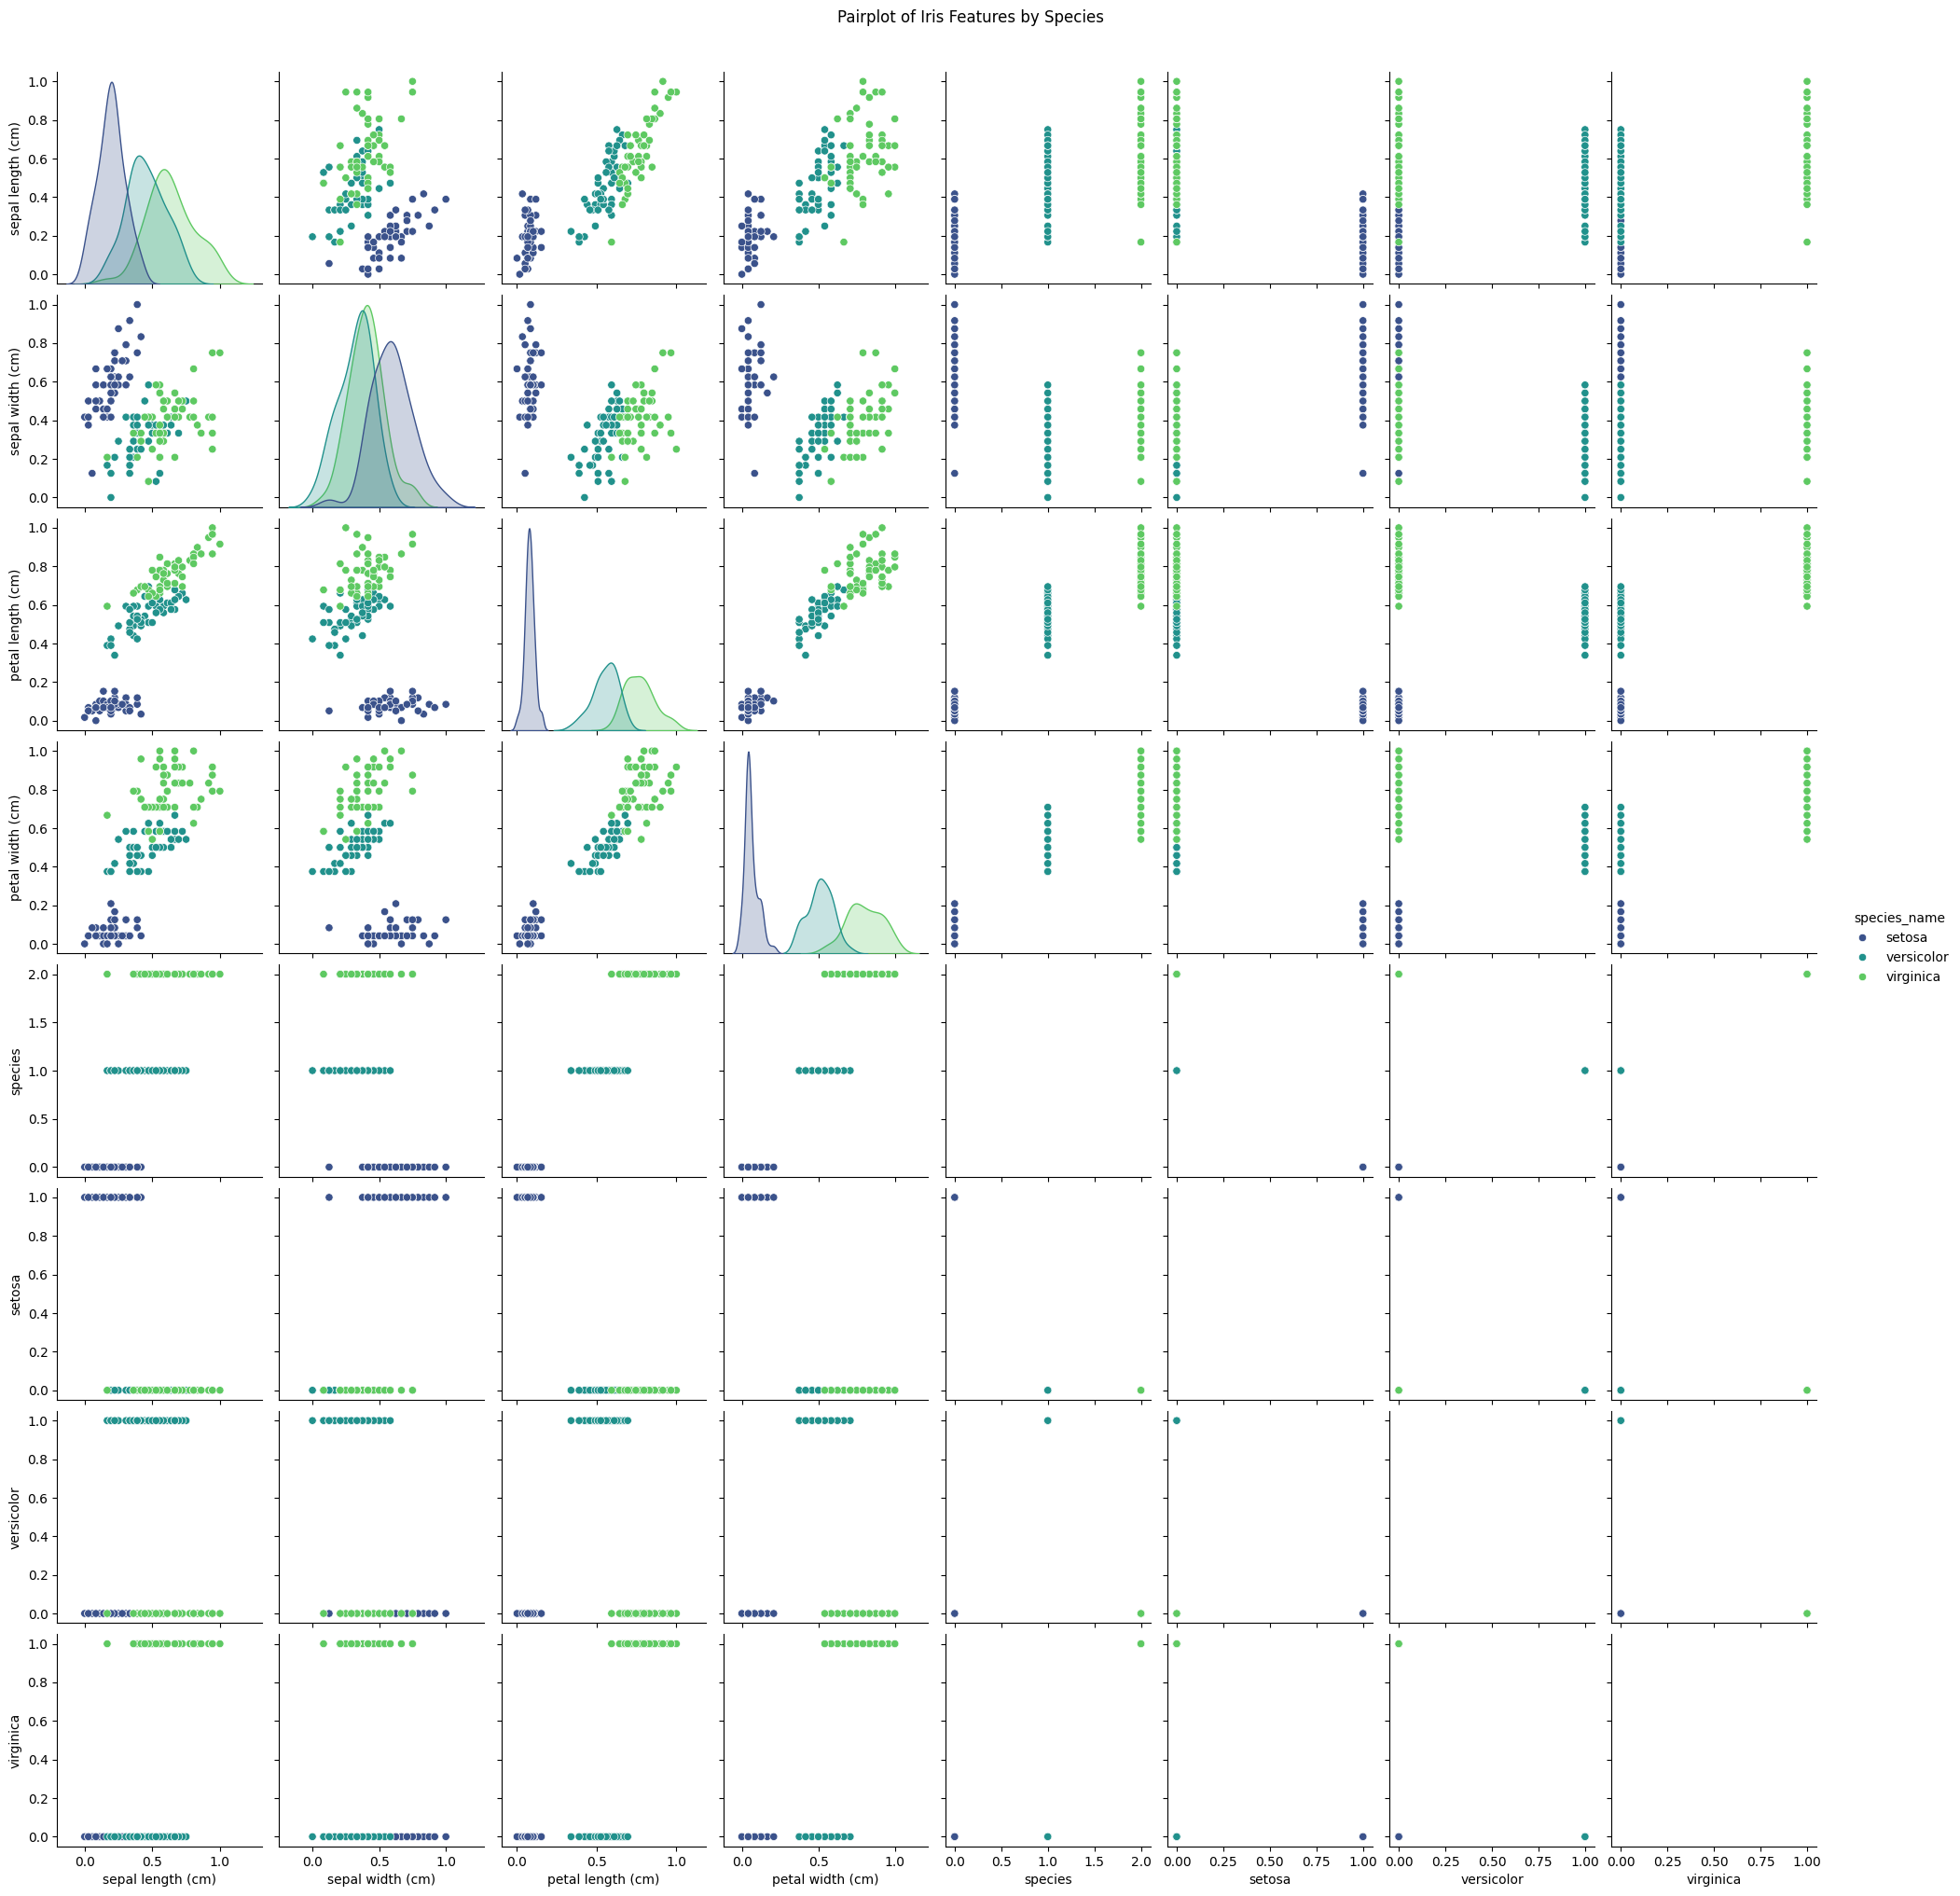

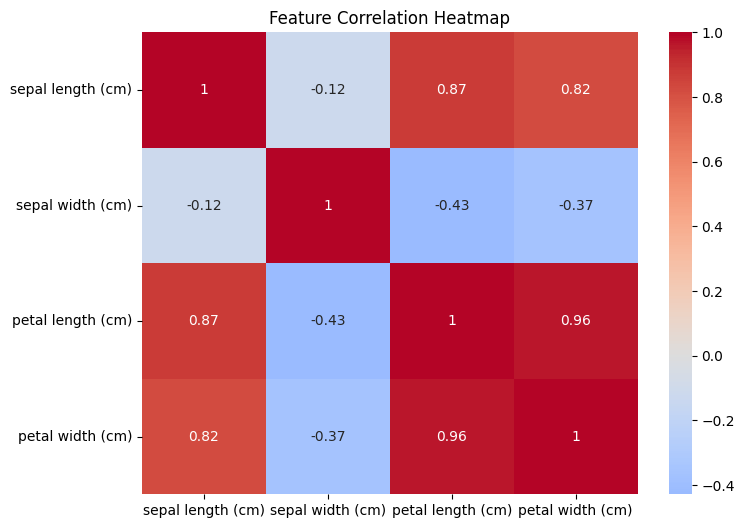

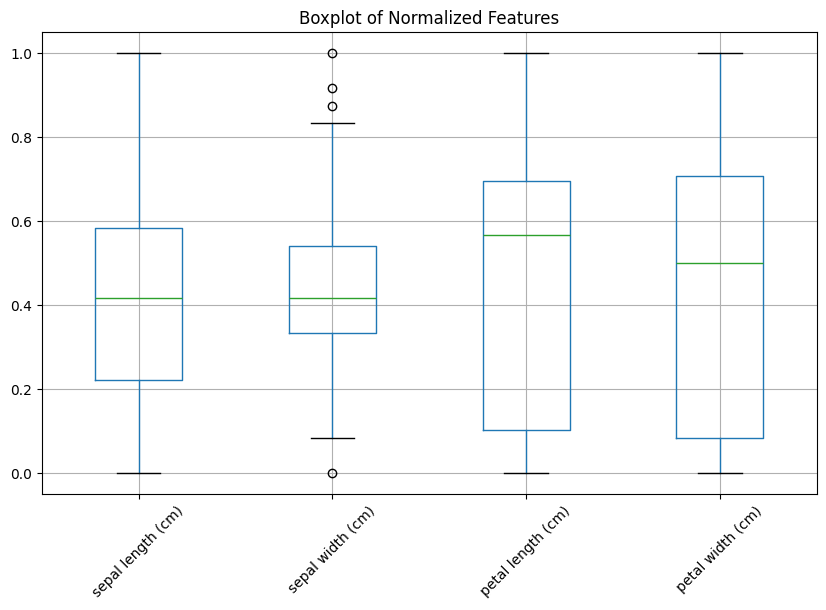


Train set: 120 samples
Test set: 30 samples

Class distribution in training set:
species
0    40
2    40
1    40
Name: count, dtype: int64

Class distribution in test set:
species
0    10
2    10
1    10
Name: count, dtype: int64


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Set random seed for reproducibility
np.random.seed(42)

# ==============================================
# 1. Load the Iris Dataset
# ==============================================
def load_data():
    """
    Load the iris dataset and return dataframe and target names.
    
    Returns:
        tuple: (dataframe, target_names)
    """
    iris = load_iris()
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df['species'] = iris.target  # Numerical labels (0, 1, 2)
    df['species_name'] = pd.Categorical.from_codes(iris.target, iris.target_names)
    return df, iris.target_names

# Load data and get target names
iris_df, target_names = load_data()
print("First 5 rows:")
print(iris_df.head())

# ==============================================
# 2. Data Preprocessing
# ==============================================
# Check for missing values
print("\nMissing values check:")
print(iris_df.isnull().sum())

# Normalize features (Min-Max scaling)
scaler = MinMaxScaler()
features = iris_df.columns[:-2]  # Exclude species columns
iris_df[features] = scaler.fit_transform(iris_df[features])

# Encode class labels (One-Hot Encoding)
encoder = OneHotEncoder(sparse_output=False)
species_encoded = encoder.fit_transform(iris_df[['species']])
encoded_df = pd.DataFrame(species_encoded, columns=target_names)
iris_df = pd.concat([iris_df, encoded_df], axis=1)

print("\nAfter preprocessing:")
print(iris_df.head())

# ==============================================
# 3. Data Exploration
# ==============================================
# Summary statistics
print("\nSummary statistics:")
print(iris_df[features].describe())

# Pairplot (colored by species)
plt.figure(figsize=(10, 8))
sns.pairplot(iris_df, hue='species_name', palette='viridis')
plt.suptitle("Pairplot of Iris Features by Species", y=1.02)
plt.savefig('iris_pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
corr_matrix = iris_df[features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.savefig('iris_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(10, 6))
iris_df[features].boxplot()
plt.title("Boxplot of Normalized Features")
plt.xticks(rotation=45)
plt.savefig('iris_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

# ==============================================
# 4. Train-Test Split Function
# ==============================================
def split_data(df, test_size=0.2, random_state=42):
    """Split data into train/test sets with stratified sampling."""
    X = df[features]
    y = df['species']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(iris_df)
print(f"\nTrain set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")

# Print class distribution
print("\nClass distribution in training set:")
print(pd.Series(y_train).value_counts())
print("\nClass distribution in test set:")
print(pd.Series(y_test).value_counts())

# Save processed data (optional)
iris_df.to_csv('processed_iris.csv', index=False)